# Augmenting the Audio files

In [58]:
!pip install tensorflow_io

In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_io as tio

In [3]:
path = "/content/drive/MyDrive/Masters Project/sample1.wav"
import librosa as lb
import librosa.display as ld
import IPython.display as ipd

In [4]:
data, sr = lb.load(path)

In [5]:
data.shape

(79872,)

In [6]:
data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.2033254e-05,
       3.2243388e-05, 1.6364798e-05], dtype=float32)

In [7]:
ipd.Audio(path)

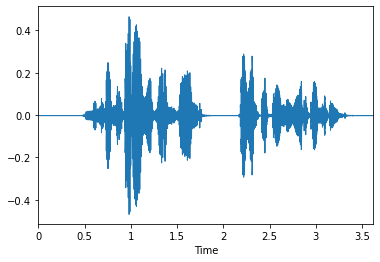

In [8]:
ld.waveplot(data, sr)

In [9]:
removed = np.delete(data, np.where(data == 0))

In [10]:
removed

array([ 8.1849078e-13, -1.7214348e-12,  2.5904780e-12, ...,
        7.2033254e-05,  3.2243388e-05,  1.6364798e-05], dtype=float32)

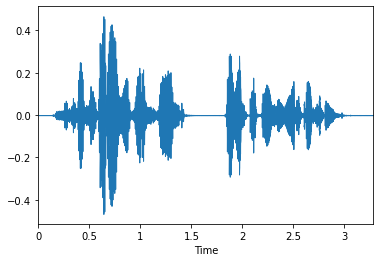

In [11]:
ld.waveplot(removed, sr)

In [12]:
ipd.Audio(removed, filename=None, rate=sr)

In [13]:
newFile = lb.effects.pitch_shift(removed, sr, 6)

In [14]:
newFile

array([-1.5520760e-07,  1.7829881e-07, -1.5859743e-07, ...,
        1.6892863e-04,  1.3523156e-04,  9.0246343e-05], dtype=float32)

In [15]:
ipd.Audio(newFile, filename=None, rate=sr)

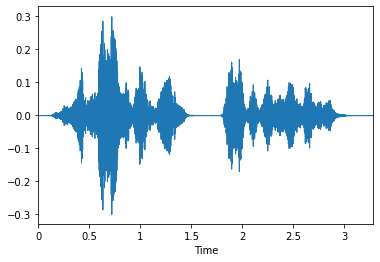

In [16]:
ld.waveplot(newFile, sr)

In [17]:
speed = lb.effects.time_stretch(removed, 1.5)

In [18]:
ipd.Audio(speed, filename=None, rate=sr)

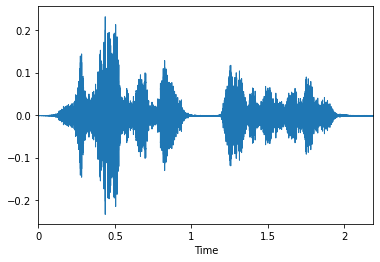

In [19]:
ld.waveplot(speed, sr)

In [26]:
import matplotlib.pyplot as plt
# generte the mel spec and MFCC
mfccOrg = lb.feature.mfcc(data, sr, n_mfcc=12)
mfccPitch = lb.feature.mfcc(newFile, sr, n_mfcc=20)
mfccSpeed = lb.feature.mfcc(speed, sr, n_mfcc=20)
cmap = plt.get_cmap('inferno')

In [27]:
logOrg = lb.feature.am

AttributeError: ignored

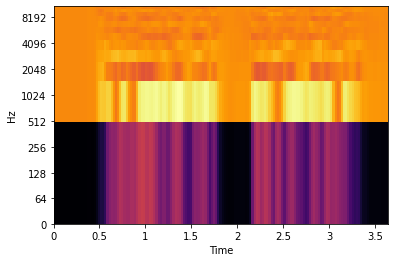

In [53]:
mfcc1 = ld.specshow(mfccOrg, x_axis="time", y_axis="log", cmap=cmap)

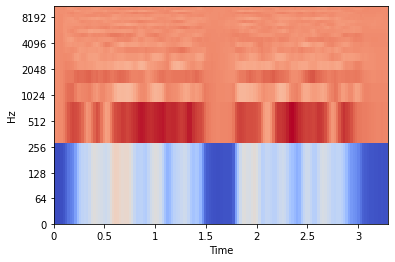

In [54]:
mfcc2 = ld.specshow(mfccPitch, x_axis="time", y_axis="log")

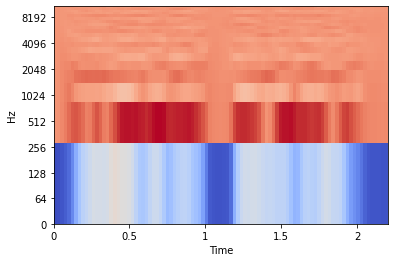

In [31]:
ld.specshow(mfccSpeed, x_axis="time", y_axis="log")

In [37]:
import scipy
from scipy.io.wavfile import read

In [38]:
samplerate, data = read(path)

In [39]:
data

array([ 0,  0,  0, ..., -1,  0,  3], dtype=int16)

In [41]:
ipd.Audio(filename=None, data=data, rate=samplerate)

In [43]:
data2 = data[data != 0]

In [44]:
data2

array([-1, -1, -1, ...,  2, -1,  3], dtype=int16)

In [47]:
data1 = data/np.mean(data)

In [48]:
data1

array([ -0.       ,  -0.       ,  -0.       , ...,  22.7815174,
        -0.       , -68.3445522])

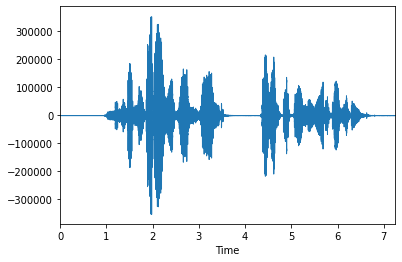

In [49]:
ld.waveplot(data1, sr)

In [51]:
data2 = data2/np.mean(data2)

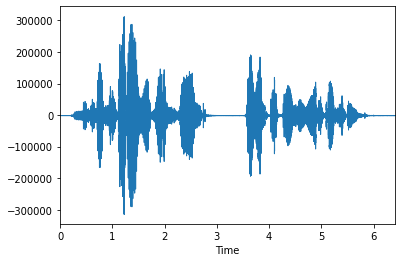

In [52]:
ld.waveplot(data2, sr)

In [60]:
audio = tio.audio.AudioIOTensor(path)

In [61]:
print(audio)

<AudioIOTensor: shape=[159744      1], dtype=<dtype: 'int16'>, rate=44100>


In [86]:
audioTensor1 = audio.to_tensor()

In [64]:
audioTensor

<tf.Tensor: shape=(159744, 1), dtype=int16, numpy=
array([[ 0],
       [ 0],
       [ 0],
       ...,
       [-1],
       [ 0],
       [ 3]], dtype=int16)>

In [74]:
audioTensor = tf.reshape(audioTensor, (1, len(audioTensor)))

In [75]:
audioTensor

<tf.Tensor: shape=(1, 159744), dtype=int16, numpy=array([[ 0,  0,  0, ..., -1,  0,  3]], dtype=int16)>

In [76]:
ipd.Audio(audioTensor.numpy(), rate=audio.rate.numpy())

In [68]:
audio.rate.numpy()

44100

In [70]:
audioTensor.numpy()

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [-1],
       [ 0],
       [ 3]], dtype=int16)

In [103]:
tensor = tf.cast(audioTensor, tf.float32)/32768.0

In [104]:
tensor

<tf.Tensor: shape=(1, 159744), dtype=float32, numpy=
array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.0517578e-05,  0.0000000e+00,  9.1552734e-05]], dtype=float32)>

In [102]:
audioTensor1 = tf.cast(audioTensor, tf.float32)

In [93]:
audioTensor1.shape

TensorShape([1, 159744])

In [99]:
ad = tf.reshape(audioTensor1, (1, len(audioTensor1)))

InvalidArgumentError: ignored

In [92]:
ld.waveplot(audioTensor1.numpy(), audio.rate.numpy())

ParameterError: ignored

TypeError: ignored

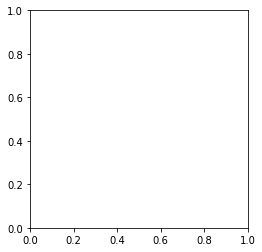

In [106]:
s = tio.audio.spectrogram(tensor.numpy(), nfft=512, window=512, stride=256)
plt.figure()
plt.imshow(tf.math.log(s).numpy())

In [107]:
!pip install tensorflow-io

In [108]:
import tensorflow as tf
import tensorflow_io as tfio

In [109]:
audioFile = tfio.audio.AudioIOTensor(path)
print(audioFile)

<AudioIOTensor: shape=[159744      1], dtype=<dtype: 'int16'>, rate=44100>


In [128]:
audioSlice = audio[100:]
audioTensor = tf.squeeze(audioSlice, axis=[-1])

In [129]:
print(audioTensor)

tf.Tensor([ 0  0  0 ... -1  0  3], shape=(159644,), dtype=int16)


In [130]:
ipd.Audio(audioTensor.numpy(), rate=audioFile.rate.numpy())

In [131]:
tensor = tf.cast(audioTensor, tf.float32)/(88200.0)

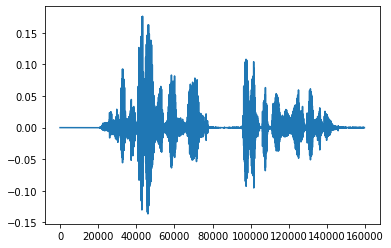

In [132]:
plt.figure()
plt.plot(tensor.numpy())

# not a good idea here

In [133]:
pos = tfio.audio.trim(tensor, axis=0, epsilon=0.1)
print(pos)

tf.Tensor([ 41342 101561], shape=(2,), dtype=int64)


In [134]:
processed = tensor[pos[0]:pos[1]]

In [135]:
print(processed)

tf.Tensor([0.10164399 0.11802721 0.12672335 ... 0.0917687  0.10212018 0.10426304], shape=(60219,), dtype=float32)


In [136]:
ipd.Audio(processed.numpy(), rate=audioFile.rate.numpy())

In [161]:
faded = tfio.audio.fade(processed, fade_in=50000, fade_out=0, mode="logarithmic")

In [162]:
ipd.Audio(faded.numpy(), rate=audioFile.rate.numpy())

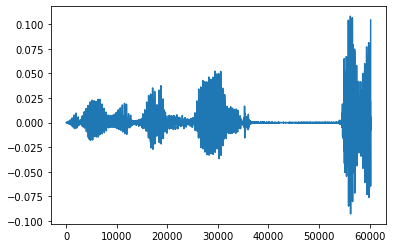

In [163]:
plt.plot(faded.numpy())

# Spects


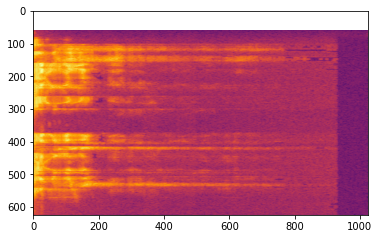

In [165]:
spec = tfio.audio.spectrogram(tensor, nfft=2048, window=512, stride=256)
plt.imshow(tf.math.log(spec).numpy(), cmap=cmap)

In [172]:
melS = tfio.audio.melscale(spec, rate=44100, mels=200, fmin=0, fmax=8000)

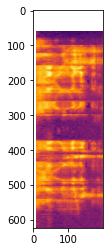

In [175]:
plt.imshow(tf.math.log(melS).numpy(), cmap=cmap)

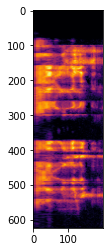

In [176]:
dbscale_mel_spectrogram = tfio.audio.dbscale(
    melS, top_db=80)

plt.figure()
plt.imshow(dbscale_mel_spectrogram.numpy(), cmap=cmap)

In [177]:
freqMask = tfio.audio.freq_mask(dbscale_mel_spectrogram, param=10)

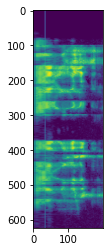

In [193]:
plt.figure()
plt.imshow(freqMask.numpy())

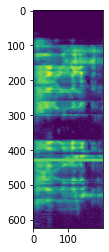

In [190]:
time_mask = tfio.audio.time_mask(dbscale_mel_spectrogram, param=10)

plt.figure()
plt.imshow(time_mask.numpy())